# Assignment 1 COMP 4304

We're going to use a dataset from *Machine Learning with R* by Brett Lantz for this assignment.  This data set has many analyses availble on [kaggle](https://www.kaggle.com/), a site which supports the data science community with datasets and worked data anlyses, including jupyter notebooks.  So you can find lots of work on the dataset; but recall the submitted work policy from the course outline: if you copy or share materials and ideas without attribution, I will consider it to be academic misconduct and serious penalties may be applied.

As well as completing the notebook, marks will be awarded for your visualization choices, within the scope of the material covered in class lecture and the instructions given below.

I am providing the rest of the notebook as a template for your submission. ~~Strikeout text~~ indicates portions of the template that you should replace with your own text explanation material and ggplots.

# Introduction

The main purpose of this analysis is to examine the effects of smoking on insurance costs in the US using annual insurance payouts. The data source is the inurance.csv which contains seven columns: age, bmi, region, children, smoker, charge, and sex. The data set contains no null values. Four main visual analysis are done on the data set.First, the effect of smoking on the annual insurance payout is examined using a box plot. Second, a box plot is  used to examine the effect of gender on the annual insurance payout.Third, a scatter plot is used to determine the distribution of BMI according to the annual insurance payout for females and males. Finally, a scatter plot is used to determine the age distribution for different levels of insurance payouts for smokers and nonsmokers. A regression model fit for insurance payouts on age is used to draw some conclusions.
     

## Data definition

In [3]:
require('tidyverse')
options(repr.plot.width = 6, repr.plot.height = 4)

Loading required package: tidyverse
Warning message:
“replacing previous import by ‘rlang:::=’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘rlang::.data’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘rlang::as_label’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘rlang::as_name’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘rlang::dots_n’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘rlang::enquo’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘rlang::enquos’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘rlang::expr’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘rlang::sym’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘rlang::syms’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘tibble::as_tibble’ when loading ‘broom’”Warning message:
“replacing previous import by

In [6]:
medDF <- read.csv('insurance.csv')
names(medDF)

[1] "age"      "sex"      "bmi"      "children" "smoker"   "region"   "charges"

## Column definition
* Age: The age of the beneficiary of the insurance policy .
* Sex: The sex of the beneficiary of the insurance policy.
* bmi: The body mass index or BMI of of the beneficiary of the insurance policy. The BMI is a ratio of the weight to height of an individual. BMI is expressed in kg/m^2.
* children: the number of dependents covered by the insurance policy.
* Smoker: Indicates if the the beneficiary of the insurance policy is a smoker or non smoker.
* Region: The residential area of the the beneficiary of the insurance policy in the US. Its divided into 4 regions
 * northeast 
 * southeast 
 * southwest
 * northwest
* charges: The annual payout in US dolls paid by the insurer.   

## The summary statistice for the data set columns

In [7]:
summary(medDF)

      age            sex           bmi           children     smoker    
 Min.   :18.00   female:662   Min.   :15.96   Min.   :0.000   no :1064  
 1st Qu.:27.00   male  :676   1st Qu.:26.30   1st Qu.:0.000   yes: 274  
 Median :39.00                Median :30.40   Median :1.000             
 Mean   :39.21                Mean   :30.66   Mean   :1.095             
 3rd Qu.:51.00                3rd Qu.:34.69   3rd Qu.:2.000             
 Max.   :64.00                Max.   :53.13   Max.   :5.000             
       region       charges     
 northeast:324   Min.   : 1122  
 northwest:325   1st Qu.: 4740  
 southeast:364   Median : 9382  
 southwest:325   Mean   :13270  
                 3rd Qu.:16640  
                 Max.   :63770  

## Smoking effect

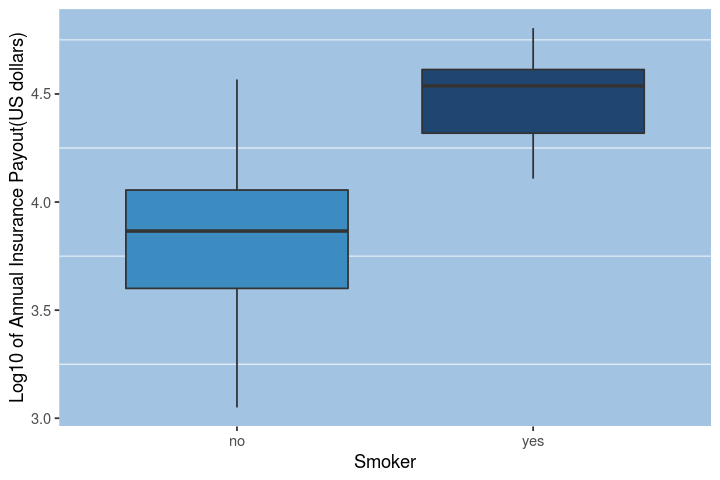

In [116]:
ggplot(medDF) + geom_boxplot(mapping=aes(y=log10(charges),x=smoker),fill = c("#3c8cc2","#1e4670")) +
                labs(x="Smoker", y="Log10 of Annual Insurance Payout(US dollars)") +
                theme(panel.background = element_rect(fill="#a3c3e3"),panel.grid.major = element_blank())

The box-plot of the log10 of the annual insurance payout for smokers and non smokers. The plot clearly shows that annual insurance payout increases substantially for smokers. The log for the payout was taken to reconcile the outliers for non smokers. These outliers appeared for two possible reasons: 
1. Accidents and emergencies: this should not be considered outliers since the purpose of most insurance polices is to cover medical cost associated with accidents and emergencies.  
2. Poor dataset: the collection methods used for the dataset are inadequate.

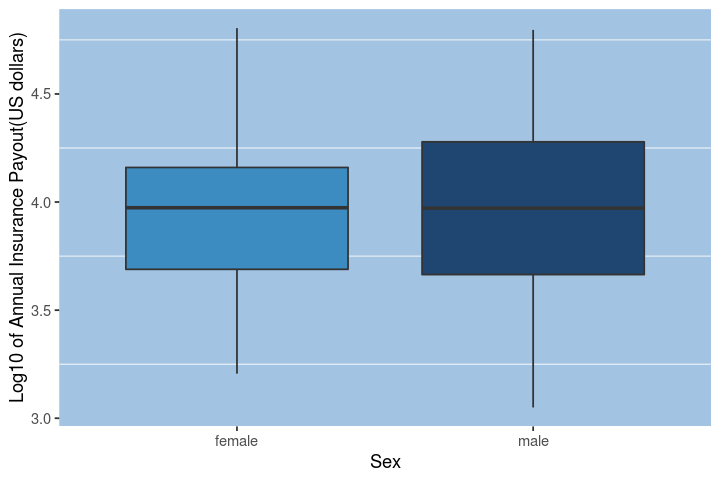

In [127]:
ggplot(medDF) + geom_boxplot(mapping=aes(y=log10(charges),x=sex),fill = c("#3c8cc2","#1e4670")) +
                labs(x="Sex", y="Log10 of Annual Insurance Payout(US dollars)") +
                theme(panel.background = element_rect(fill="#a3c3e3"),panel.grid.major = element_blank())

The boxplot of the log10 of the annual insurance payout for male and female. The plot shows that sex has no effect on the annual insurance payout.

## BMI and Age

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


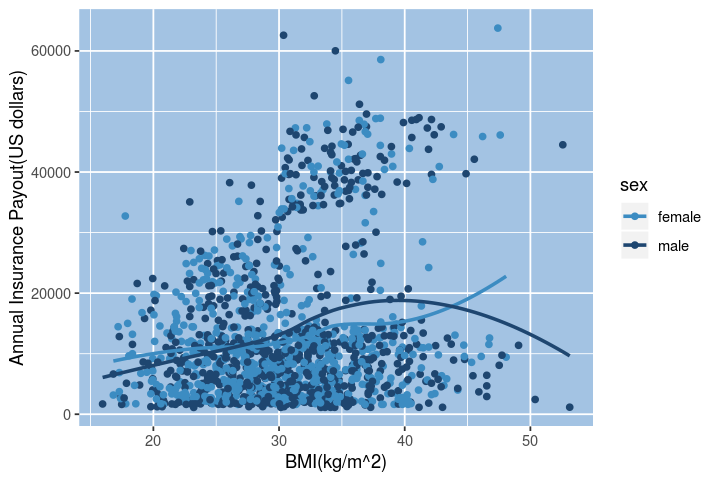

In [125]:
ggplot(medDF,aes(x = bmi, y = charges, color= sex)) + geom_point()+geom_smooth(se = FALSE)+
                labs(x="BMI(kg/m^2)", y="Annual Insurance Payout(US dollars)") +
                theme(panel.background = element_rect(fill="#a3c3e3"))+scale_color_manual(values=c("#3c8cc2","#1e4670"))

The scatter-plot of the annual insurance payout and BMI for females and males. A higher BMI indicates obesity. The plot shows that for females, as the BMI increases, the annual insurance payout increases. This not true for males however. For males, the plot shows that the annual insurance payout actually decrease when it reaches the upper end of the BMI.This unusal since in the real world, extreme obesity is associated with increased health risks for both males and females.  

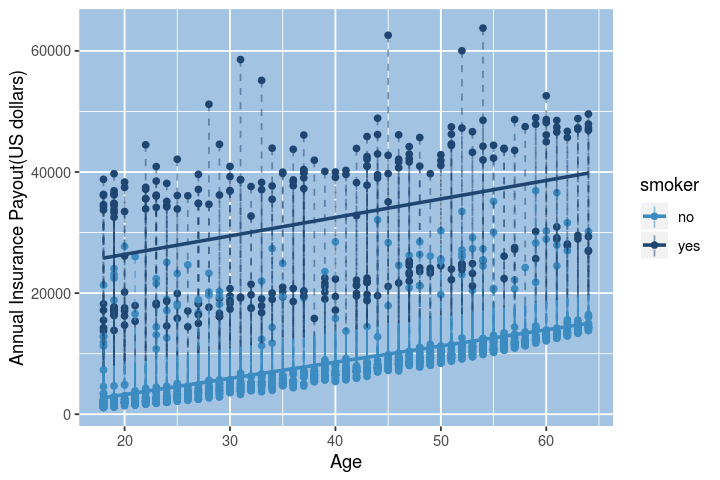

In [124]:
fit <- lm(charges ~ age, medDF) 
medDF$residuals <- residuals(fit)
ggplot(medDF,aes(x = age, y = charges, color= smoker)) + geom_point()+geom_smooth(method = "lm",se = FALSE)+
                labs(x="Age", y="Annual Insurance Payout(US dollars)") +
                theme(panel.background = element_rect(fill="#a3c3e3"))+scale_color_manual(values=c("#3c8cc2","#1e4670"))+
                geom_linerange(aes(ymin=charges,ymax=charges-fit$residuals), linetype='dashed', alpha = 0.5)

The scatter-plot of the annual insurance payout and age for smokers and non smokers. For non smokers, the regression line and residuals  indicate that there is strong association between the amount of insurance payout  and age which is consistent with the real world. For smokers, the regression line and residual indicates no association between the amount of insurance payout and age. 

## Conclusion about visualizations

One area of visualization that can be improved is how the residual from the regression line of the annual insurance payout on age for smokers is presented. The high residual caused confusing visualization. Another improvement is to use a different kind of plot to present the relationship between the annual insurance payout and gender. The box plot showed misleading outliers which was negated by taking the log of the annual insurance payout in this analysis.  

## Sources
* https://www.kaggle.com/hely333/eda-regression
* https://www.kaggle.com/ruslankl/health-care-cost-prediction-w-linear-regression
* http://www.sthda.com/english/
* https://www.datanovia.com/en/
* https://www.kaggle.com/mirichoi0218/insurance/data
